<a href="https://colab.research.google.com/github/HongEnJung/Kaggle/blob/main/House_Prices/House_Prices_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
- 데이터에서 중요한 컬럼
1. SalePrice: 주택의 판매 가격, 이 컬럼은 예측하려는 타겟 변수
2. OverallQual: 주택 전반적인 자질에 대한 평가 점수, 이 컬럼은 1부터 10까지의 값으로 이루어져 있으며, 높은 값일수록 더 좋은 자질을 가진 주택
3. GrLivArea: 지상 생활 면적, 이 컬럼은 평방 피트 단위로 이루어져 있으며, 주택의 크기를 나타내는 중요한 변수 중 하나
4. YearBuilt: 주택 건축 년도, 이 컬럼은 주택의 연식을 나타내는 중요한 변수 중 하나
5. GarageCars: 차고에 수용 가능한 차량 수, 이 컬럼은 차고의 크기와 관련이 있으며, 차량 수가 많을수록 주택의 가치가 높아질 가능성이 있음
6. Neighborhood: Ames의 지역 이름, 이 컬럼은 지역에 따른 부동산 시장의 차이를 고려할 때 중요한 변수 중 하나
```



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#matplotlib inline

In [2]:
df_train = pd.read_csv("/content/drive/MyDrive/House Prices/train.csv")

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# First things first: analysing 'SalePrice'

In [9]:
# 주택가격
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

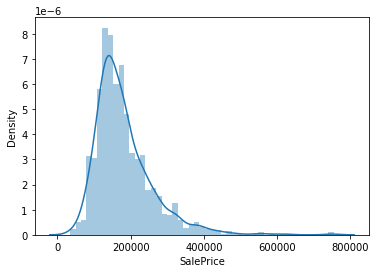

In [10]:
# 히스토그램
sns.distplot(df_train['SalePrice'])

In [13]:
# 왜도 계산 (분포가 대칭인지 비대칭인지)
# 대칭 분포인 경우 0, 왼쪽으로 치우친 경우 음수, 오른쪽으로 치우친 경우 양수
print('Skewness: %f' % df_train['SalePrice'].skew())

# 첨도 계산
# 분포의 꼬리 부분의 두께
# 정규분포와 같은 경우 3, 작으면 분포가 납작, 크면 분포가 뾰족
print('Kurtosis: %f' % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

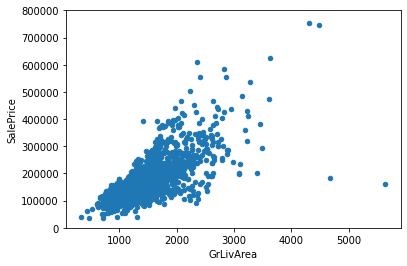

In [16]:
# GrLivArea: 지상 생활 면적, SalePrice: 주택의 판매 가격의 산점도
var='GrLivArea'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [ ]:
# TotalBsmtSF: 부동산의 지하실 총 면적,SalePrice: 주택의 판매 가격의 산점도
var='TotalBsmtSF'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
